In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
!pip install lshash3

     |████████████████████████████████| 51kB 2.4MB/s 
  Created wheel for lshash3: filename=lshash3-0.0.8-py2.py3-none-any.whl size=10138 sha256=f34efc3d583ad25f66c9c56363c908798f61f904e0fc6d0ce68cf44de98ee60d
  Stored in directory: /root/.cache/pip/wheels/30/7f/09/f8d846b30660911ca453e60d71af991bd8a506e804a7df6100
  Created wheel for bitarray: filename=bitarray-1.2.1-cp36-cp36m-linux_x86_64.whl size=105054 sha256=6527f8c03c0192953a6979c1e53f4f0552d60d66085f865e43ab7b86eebb90e6
  Stored in directory: /root/.cache/pip/wheels/8e/4f/42/90d76aca9f4a7420c8c82fe15ed949777ab3fafe9fc1d705b3
Successfully built lshash3 bitarray


In [0]:
import click
import requests
from io import BytesIO
from pathlib import Path
import pickle
from PIL import Image as pil_img
import numpy as np
from fastai.vision.data import ImageDataBunch
from fastai.vision.transform import get_transforms
from fastai.vision.learner import create_cnn
from fastai.vision import models
from fastai.vision.image import pil2tensor, Image
import matplotlib
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from imutils import resize

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp "/content/drive/My Drive/Makeathon/Caltech/101_ObjectCategories.tar.gz" "/content/101_ObjectCategories.tar.gz"

In [14]:
!tar -zxvf "/content/drive/My Drive/Makeathon/Caltech/101_ObjectCategories.tar.gz" -o./Caltech/Images

tar: invalid option -- '.'
Try 'tar --help' or 'tar --usage' for more information.


In [0]:
path = Path('/content/101_ObjectCategories/')

In [0]:
!mkdir /content/models/

In [27]:
#Loading Data and Model
tfms = get_transforms(
    do_flip=False, 
    flip_vert=False, 
    max_rotate=0, 
    max_lighting=0, 
    max_zoom=1, 
    max_warp=0
)
data = (ImageList.from_folder(path)
        .random_split_by_pct(0.2)
        .label_from_folder()
        .transform(tfms=tfms, size=224)
        .databunch(bs=64))

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:215: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


In [28]:
print('Number of classes {0}'.format(data.c))
print(data.classes)

Number of classes 102
['BACKGROUND_Google', 'Faces', 'Faces_easy', 'Leopards', 'Motorbikes', 'accordion', 'airplanes', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'se

In [29]:
print('Train dataset size: {0}'.format(len(data.train_ds.x)))
print('Test dataset size: {0}'.format(len(data.valid_ds.x)))

Train dataset size: 7316
Test dataset size: 1828


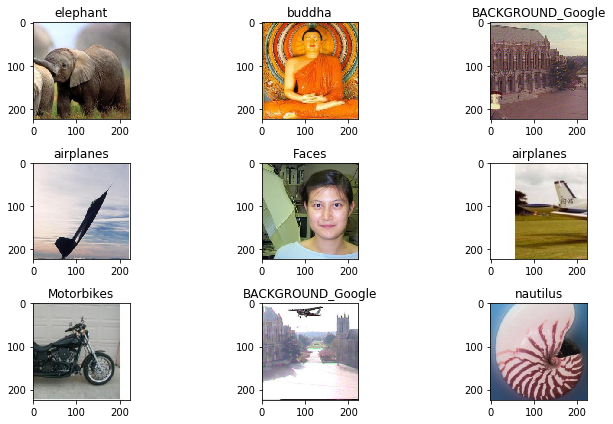

In [30]:
## Show sample data
data.show_batch(rows=3, figsize=(10,6), hide_axis=False)

In [32]:
## Creating the model
learn = create_cnn(data, models.resnet34, pretrained=True, metrics=accuracy)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


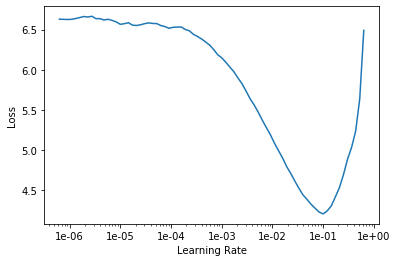

In [33]:
## Finding Ideal learning late
learn.lr_find()
learn.recorder.plot()

In [0]:
## Fitting 5 epochs
learn.fit_one_cycle(5,1e-2)

epoch,train_loss,valid_loss,accuracy,time


In [0]:
## Saving stage 1
learn.save('/content/models/caltech-stg1-rn34')

In [0]:
## Unfreeing layer and finding ideal learning rate
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
## Fitting 5 epochs
learn.fit_one_cycle(5, slice(1e-5, 1e-2/5))

In [0]:
## Saving model weights
learn.save('/content/models/caltech-stg2-rn34')

In [0]:
# this is a hook (learned about it here: https://forums.fast.ai/t/how-to-find-similar-images-based-on-final-embedding-layer/16903/13)
# hooks are used for saving intermediate computations
class SaveFeatures():
    features=None
    def __init__(self, m): 
        self.hook = m.register_forward_hook(self.hook_fn)
        self.features = None
    def hook_fn(self, module, input, output): 
        out = output.detach().cpu().numpy()
        if isinstance(self.features, type(None)):
            self.features = out
        else:
            self.features = np.row_stack((self.features, out))
    def remove(self): 
        self.hook.remove()
        
sf = SaveFeatures(learn.model[1][5]) ## Output before the last FC layer

In [0]:
## By running this feature vectors would be saved in sf variable initated above
_= learn.get_preds(data.train_ds)
_= learn.get_preds(DatasetType.Valid)

In [0]:
img_path = [str(x) for x in (list(data.train_ds.items)+list(data.valid_ds.items))]
feature_dict = dict(zip(img_path,sf.features))

In [0]:
## Exporting as pickle
pickle.dump(feature_dict, open("/content/models/feature_dict.p", "wb"))

In [0]:
##Using Locality Sensitive hashing to find near similar images
## Loading Feature dictionary
feature_dict = pickle.load(open('/content/models/feature_dict.p','rb'))

In [0]:
## Locality Sensitive Hashing
# params
k = 10 # hash size
L = 5  # number of tables
d = 512 # Dimension of Feature vector
lsh = LSHash(hash_size=k, input_dim=d, num_hashtables=L)

# LSH on all the images
for img_path, vec in tqdm_notebook(feature_dict.items()):
    lsh.index(vec.flatten(), extra_data=img_path)

In [0]:
## Exporting as pickle
pickle.dump(lsh, open('/content/models/lsh.p', "wb"))

In [0]:
## Loading Feature dictionary
feature_dict = pickle.load(open('/content/models/feature_dict.p','rb'))
lsh = pickle.load(open('/content/models/lsh.p','rb'))

def get_similar_item(idx, feature_dict, lsh_variable, n_items=5):
    response = lsh_variable.query(feature_dict[list(feature_dict.keys())[idx]].flatten(), 
                     num_results=n_items+1, distance_func='hamming')
    
    columns = 3
    rows = int(np.ceil(n_items+1/columns))
    fig=plt.figure(figsize=(2*rows, 3*rows))
    for i in range(1, columns*rows +1):
        if i<n_items+2:
            img = Image.open(response[i-1][0][1])
            fig.add_subplot(rows, columns, i)
            plt.imshow(img)
    return plt.show()

In [0]:
get_similar_item(0, feature_dict, lsh,5)

In [0]:
get_similar_item(1000, feature_dict, lsh,5)

In [0]:
get_similar_item(2000, feature_dict, lsh, 8)

In [0]:
!mv "/content/models/stg2-rn34.pth" "/content/drive/My Drive/Makeathon/Caltech"

In [0]:
!mv "/content/models/stg1-rn34.pth" "/content/drive/My Drive/Makeathon/Caltech"

In [0]:
!mv "/content/models/lsh.p" "/content/drive/My Drive/Makeathon/Caltech"

In [0]:
!mv "/content/models/feature_dict.p" "/content/drive/My Drive/Makeathon/Caltech"